In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [3]:
races = ['asian','black','hispanic','other','white']
voter_race = np.random.choice(a=races,
                             p=[0.05,0.15,0.25,0.05,0.5],
                             size=1000)
voter_age =stats.poisson.rvs(loc=18,
                             mu=30,
                             size=1000)
voter_frame=pd.DataFrame({'race':voter_race,'age':voter_age})
groups = voter_frame.groupby('race').groups

In [4]:
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
other= voter_age[groups['other']]
white = voter_age[groups['white']]

In [5]:
stats.f_oneway(asian,black,hispanic,other,white)

F_onewayResult(statistic=1.2566647255977614, pvalue=0.28534955569761333)

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('age ~ race',
         data=voter_frame).fit()
anova_result = sm.stats.anova_lm(model,type=2)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
race,4.0,150.07148,37.517870,1.256665,0.28535
Residual,995.0,29705.83952,29.855115,NaN,NaN


In [7]:
# pip install statsmodels

In [8]:
race_pairs = []
for race1 in range(4):
    for race2 in range(race1+1,5):
        race_pairs.append((races[race1],races[race2]))
        
for race1,race2 in race_pairs:
    print(race1,race2)
    print(stats.ttest_ind(voter_age[groups[race1]],voter_age[groups[race2]]))

asian black
Ttest_indResult(statistic=-1.2073031064188806, pvalue=0.22875568683756897)
asian hispanic
Ttest_indResult(statistic=-0.022311364033657674, pvalue=0.9822168297367998)
asian other
Ttest_indResult(statistic=-0.7186338017904311, pvalue=0.47424905693609054)
asian white
Ttest_indResult(statistic=-0.8894265287305873, pvalue=0.37414327309132156)
black hispanic
Ttest_indResult(statistic=1.9359063777510062, pvalue=0.05364058881033093)
black other
Ttest_indResult(statistic=0.3370351827820687, pvalue=0.7364420375135967)
black white
Ttest_indResult(statistic=0.8136059990168174, pvalue=0.4161509591117786)
hispanic other
Ttest_indResult(statistic=-0.9137879889778951, pvalue=0.3616716193824798)
hispanic white
Ttest_indResult(statistic=-1.6727619215730716, pvalue=0.0947906582012999)
other white
Ttest_indResult(statistic=0.10306270723979635, pvalue=0.9179487041714693)


group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,1.1527,0.7303,-1.3962,3.7015,False
asian,hispanic,0.0202,1.0,-2.4495,2.4899,False
asian,other,0.8346,0.95,-2.2977,3.9669,False
asian,white,0.7499,0.906,-1.5916,3.0913,False
black,hispanic,-1.1325,0.2802,-2.7014,0.4364,False
black,other,-0.3181,0.9968,-2.8026,2.1665,False
black,white,-0.4028,0.9274,-1.7609,0.9553,False
hispanic,other,0.8144,0.8868,-1.5889,3.2178,False
hispanic,white,0.7297,0.461,-0.4734,1.9328,False
other,white,-0.0847,1.0,-2.3561,2.1866,False


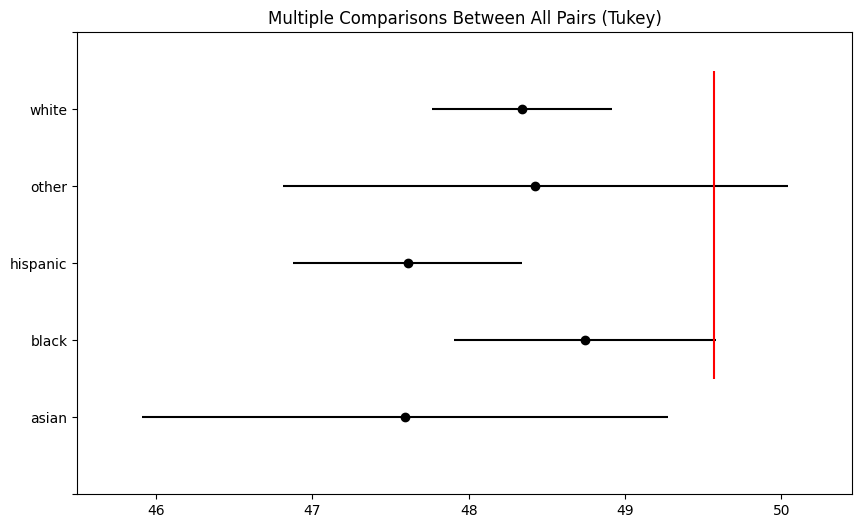

In [9]:
import matplotlib.pyplot as plt

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=voter_age,
                         groups=voter_race,
                         alpha=0.05)
tukey.plot_simultaneous()
plt.vlines(x=49.57,ymin=0.5,ymax=4.5,color='red')
tukey.summary()